In [1]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
# from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
import keras
from keras.constraints import max_norm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import models
%matplotlib inline

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [3]:
# import keras

# config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} )
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

In [4]:
# # Splitting images Train/Val/Test

# import split_folders
# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# split_folders.ratio('dataset/all_cameras', output="dataset/all_split_2", seed=45, ratio=(.9, .10)) # default values

In [4]:
base_dir = 'dataset/all_cameras_splitted'
test_dir =  os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'Val')

# Directory with our training pictures
train_OK_dir = os.path.join(train_dir, 'OK')
train_NOT_OK_dir = os.path.join(train_dir, 'NOT_OK')

# Directory with our validation pictures
validation_OK_dir = os.path.join(validation_dir, 'OK')
validation_NOT_OK_dir = os.path.join(validation_dir, 'NOT_OK')
train_OK_fnames = os.listdir( train_OK_dir )
train_NOT_OK_fnames = os.listdir( train_NOT_OK_dir )

# print(train_cat_fnames[:10])
# print(train_dog_fnames[:10])



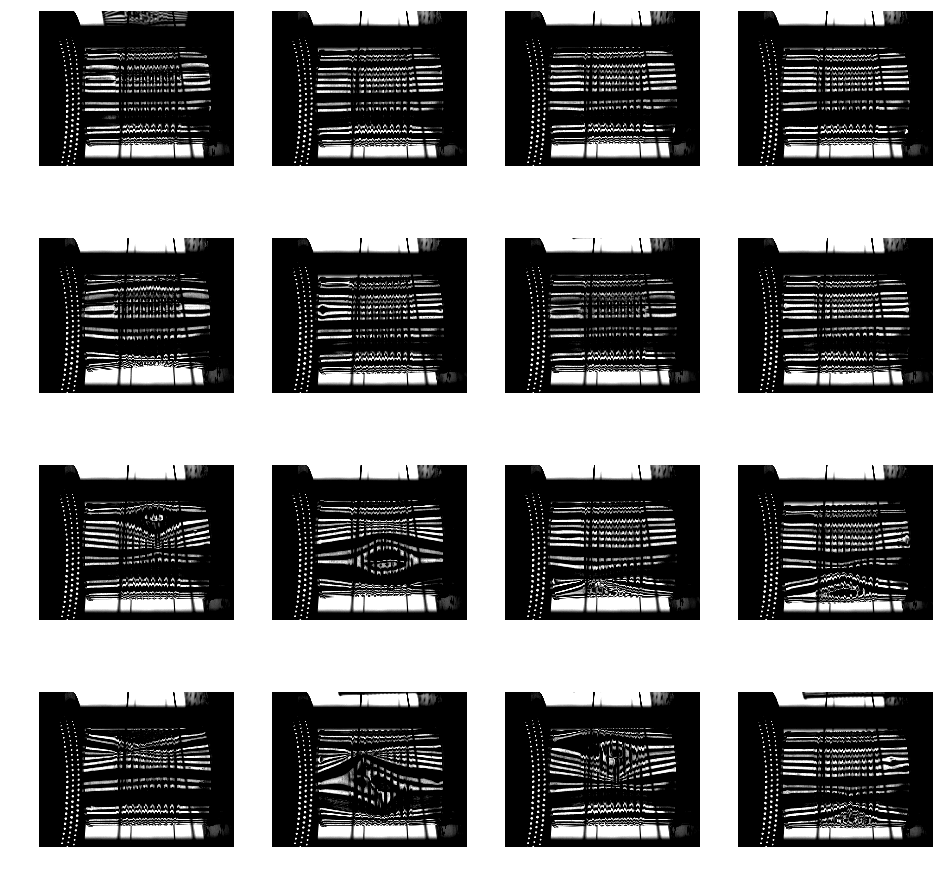

In [5]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_OK_pix = [os.path.join(train_OK_dir, fname) 
                for fname in train_OK_fnames[ pic_index-8:pic_index] 
               ]

next_NOT_OK_pix = [os.path.join(train_NOT_OK_dir, fname) 
                for fname in train_NOT_OK_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_OK_pix+next_NOT_OK_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
#   print(img.shape)  
  plt.imshow(img, 'gray')

In [6]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
      rescale=1/255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       fill_mode='nearest',
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images

        ### En esta linea de codigo se cambia el tamaño de la imagen

        target_size=(256, 256),  # All images will be resized 

        ####

        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow training images in batches of 128 using train_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images

        ##Tamaño de imagen del validation dataset


        target_size=(256, 256),  # All images will be resized 
        ###


        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 16761 images belonging to 2 classes.
Found 3351 images belonging to 2 classes.


In [8]:
# def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims[:, :, ::-1]
            
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#             ims[i] = np.reshape(ims[i],((128,128)))
#         plt.imshow(ims[i], interpolation=None if interp else 'none')
#         print(ims[i].shape)
# imgs, labels = next(train_generator)

# plots(imgs)

In [11]:
# with tf.device('/cpu:0'):
classifier = Sequential()
classifier.add(Convolution2D(32,(5,5),input_shape=(256, 256,3),activation= "relu",padding="same",kernel_constraint=max_norm(3))) ##
#     classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2,2)))
#     classifier.add(Convolution2D(32,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
#     classifier.add(Convolution2D(32,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
#     classifier.add(Convolution2D(32,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
#     classifier.add(MaxPooling2D(2))
#     classifier.add(Convolution2D(64,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
classifier.add(Convolution2D(64,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(2))
classifier.add(Convolution2D(128,(3,3),activation='relu',padding="same"))
classifier.add(MaxPooling2D(2))
#     classifier.add(BatchNormalization())
# classifier.add(Convolution2D(128,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
classifier.add(Convolution2D(256,(3,3),activation='relu',padding="same"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(2))
#     classifier.add(Convolution2D(256,(3,3),activation='relu',padding="same"))
#     classifier.add(BatchNormalization())
classifier.add(Convolution2D(256,(3,3),activation='relu',padding="same",kernel_constraint=max_norm(3)))
#     classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(2))
classifier.add(Convolution2D(512,(3,3),activation='relu',padding="same"))
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(2))
#     classifier.add(Convolution2D(512,(3,3),activation='relu',padding="same"))
# classifier.add(BatchNormalization())
# classifier.add(MaxPooling2D(2))

classifier.add(Flatten())
#     classifier.add(Dense(units=2048,activation='relu'))
# # classifier.add(Dropout(0.5))
classifier.add(Dense(256, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros'))
classifier.add(Dropout(0.4))
classifier.add(Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros'))
classifier.add(Dropout(0.4))
classifier.add(Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(0.01),kernel_initializer='random_normal',
    bias_initializer='zeros'))
#     classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=16,activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros'))
#     classifier.add(Dense(units=32,activation='relu'))
#     classifier.add(Dense(units=16,activation='relu'))
#     classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

# classifier.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])


sgd = keras.optimizers.SGD(lr=0.01)
classifier.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       2

In [13]:
# from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices())

In [14]:
with tf.device('/cpu:0'):
    filepath="10-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', mode="max", factor = 0.7, 
         patience = 5, verbose = 1, min_delta =0.00001)
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

    callbacks = [reduce_lr,checkpoint,early_stop]

    batch_size = 128

    history = classifier.fit(train_generator,
                                       steps_per_epoch = math.ceil(train_generator.samples//batch_size),
                                  validation_data=validation_generator,  
                                       validation_steps=math.ceil(validation_generator.samples//batch_size),
                                  epochs=100,workers=-1, 
                                use_multiprocessing=True, shuffle=True, callbacks=callbacks
                                      )

Epoch 1/100
157/157 [==============================] - 2158s 14s/step - loss: 3.7440 - accuracy: 0.6543 - val_loss: 2.8378 - val_accuracy: 0.7413

Epoch 00001: val_accuracy improved from -inf to 0.74127, saving model to 10-improvement-01-0.74.h5
Epoch 2/100
157/157 [==============================] - 2206s 14s/step - loss: 2.4313 - accuracy: 0.7430 - val_loss: 1.8261 - val_accuracy: 0.7937

Epoch 00002: val_accuracy improved from 0.74127 to 0.79366, saving model to 10-improvement-02-0.79.h5
Epoch 3/100
157/157 [==============================] - 2253s 14s/step - loss: 1.5436 - accuracy: 0.8092 - val_loss: 1.1650 - val_accuracy: 0.8396

Epoch 00003: val_accuracy improved from 0.79366 to 0.83961, saving model to 10-improvement-03-0.84.h5
Epoch 4/100
157/157 [==============================] - 2142s 14s/step - loss: 0.9921 - accuracy: 0.8279 - val_loss: 0.7209 - val_accuracy: 0.8428

Epoch 00004: val_accuracy improved from 0.83961 to 0.84283, saving model to 10-improvement-04-0.84.h5
Epoch 5

In [48]:
for train_index, val_index in kfold.split(np.zeros(data.shape[0]),Y):


TypeError: 'training_data' is an invalid keyword argument for print()

In [15]:
# classifier.save('model_continue.h5')

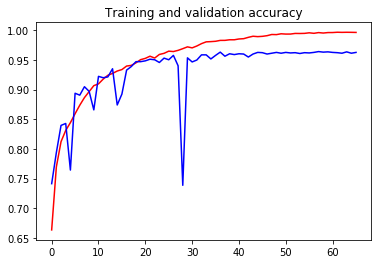

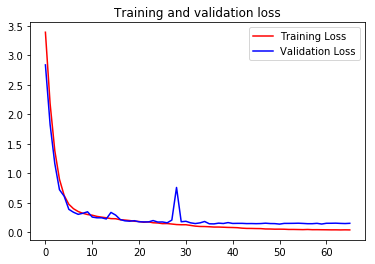

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
from keras.models import load_model
with tf.device('/cpu:0'):
    model = load_model('5_weights-improvement-31-0.96.h5')
    model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])



In [19]:
# test_datagen = ImageDataGenerator(rescale=1/255)
# # Flow training images in batches of 128 using train_datagen generator
# test_generator = test_datagen.flow_from_directory(
#         test_dir,  # This is the source directory for training images

#         ##Tamaño de imagen del validation dataset


#         target_size=(512, 512),  # All images will be resized 
#         ###


#         batch_size=128,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization_3 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 256)       147712    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 256)      

In [45]:
with tf.device('/cpu:0'):
    filepath="6_continue_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', mode="max", factor = 0.7, 
         patience = 5, verbose = 1, min_delta =0.00001)
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, mode='auto')

    callbacks = [reduce_lr,checkpoint,early_stop]

    batch_size = 256

    history = model.fit(train_generator,
                                       steps_per_epoch = math.ceil(train_generator.samples//batch_size),
                                  validation_data=validation_generator,  
                                       validation_steps=math.ceil(validation_generator.samples//batch_size),
                                  epochs=70,workers=-1, 
                                use_multiprocessing=True, shuffle=True, callbacks=callbacks
                                  )

Epoch 1/70
78/78 [==============================] - 792s 10s/step - loss: 0.1439 - accuracy: 0.9557 - val_loss: 0.2019 - val_accuracy: 0.9375

Epoch 00001: val_accuracy improved from -inf to 0.93750, saving model to 6_continue_weights-improvement-01-0.94.h5
Epoch 2/70
78/78 [==============================] - 787s 10s/step - loss: 0.1175 - accuracy: 0.9658 - val_loss: 0.1349 - val_accuracy: 0.9570

Epoch 00002: val_accuracy improved from 0.93750 to 0.95703, saving model to 6_continue_weights-improvement-02-0.96.h5
Epoch 3/70
78/78 [==============================] - 808s 10s/step - loss: 0.1132 - accuracy: 0.9607 - val_loss: 0.1963 - val_accuracy: 0.9434

Epoch 00003: val_accuracy did not improve from 0.95703
Epoch 4/70
78/78 [==============================] - 809s 10s/step - loss: 0.1560 - accuracy: 0.9442 - val_loss: 0.1287 - val_accuracy: 0.9453

Epoch 00004: val_accuracy did not improve from 0.95703
Epoch 5/70
78/78 [==============================] - 796s 10s/step - loss: 0.1241 - ac

In [11]:
batch_size= 32
y = model.predict_generator(test_generator,steps= math.ceil(test_generator.samples//batch_size),workers=8)

In [28]:
scoreSeg = model.evaluate_generator(test_generator,862)
print("Accuracy = ",scoreSeg[1])

Accuracy =  0.9790712594985962


In [30]:
loss,acc = model.evaluate(test_generator)
print("restored model , accuracy in the test set :  ",acc)

27/27 [==============================] - 45s 2s/step
restored model , accuracy in the test set :   0.9791183471679688


27/26 [==============================] - 46s 2s/step
number of errors = 346/862
[[ 67 174]
 [172 449]]


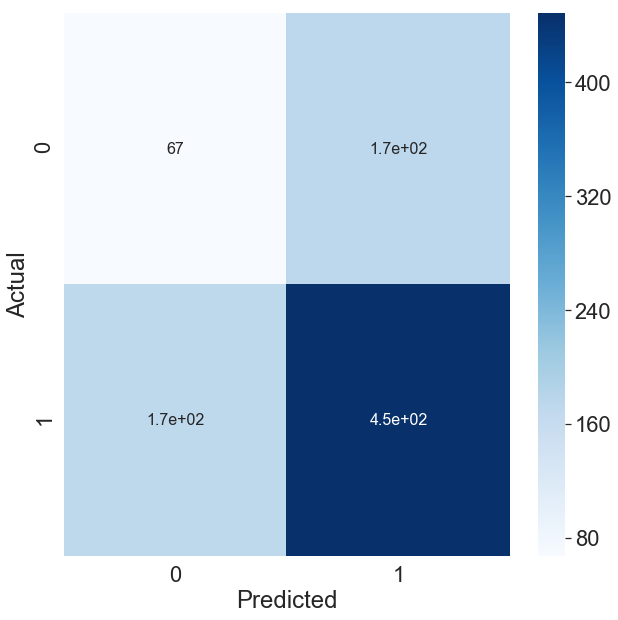

In [32]:
# Get the ground truth from generator
ground_truth = test_generator.classes
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.around(predictions) 
predicted_classes = predicted_classes.astype(int)
predicted_classes = predicted_classes[:,0]
errors = np.where(predicted_classes != ground_truth)[0]
print("number of errors = {}/{}".format(len(errors),test_generator.samples))
cm = confusion_matrix(ground_truth, predicted_classes)
data = confusion_matrix(ground_truth, predicted_classes)
print(cm)
df_cm = pd.DataFrame(data, columns=np.unique(ground_truth), index = np.unique(ground_truth))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.set(font_scale=2)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       241
           1       0.72      0.72      0.72       621

    accuracy                           0.60       862
   macro avg       0.50      0.50      0.50       862
weighted avg       0.60      0.60      0.60       862



[[1.]]
OK


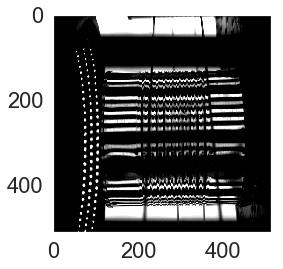

In [114]:
from keras.preprocessing import image


path='dataset/cam1_splitted/test/OK/imagen_2020_12_18_1137_24318.png' 
img=image.load_img(path, target_size=(512, 512))
plt.imshow(img)  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes)
if classes[0]>0.5:
    print( "OK")
    
else:
    print( " NOT OK")

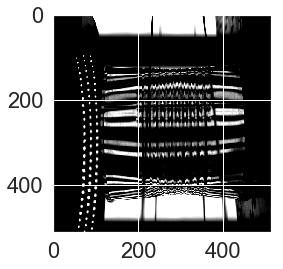

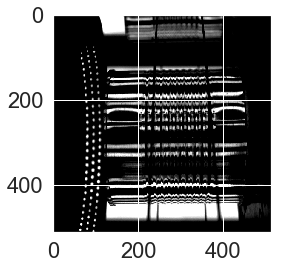

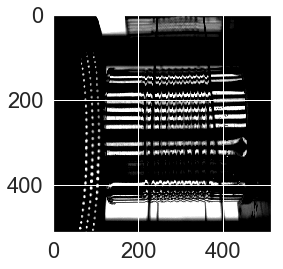

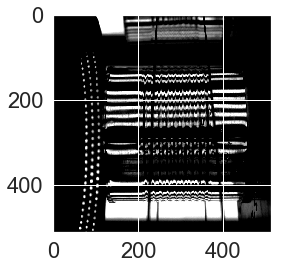

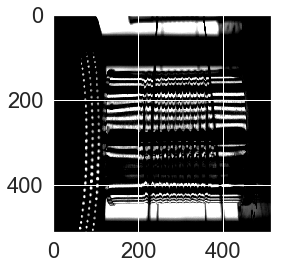

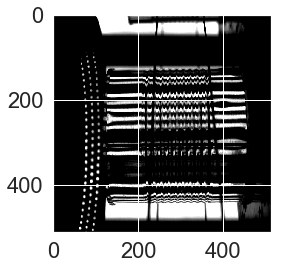

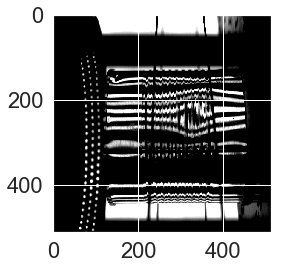

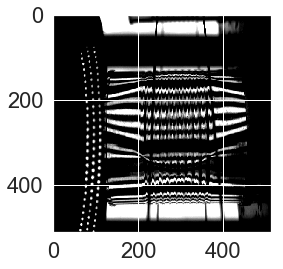

In [142]:
import PIL
from keras.preprocessing import image
import glob
%matplotlib inline

for i,filename in enumerate(glob.glob("dataset/cam1_splitted/test/OK/*.png"), 1):
    img=image.load_img(filename, target_size=(512, 512))
#     plt.figure()
   
    
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
  
    if classes[0]<0.5:
#         plt.axis('off')
#         plt.grid(b=None)
#         plt.figure(figsize=((10,10)))
# #         plt.subplot(300, 4, i+1)
        plt.imshow(img)
        plt.show()
    
    

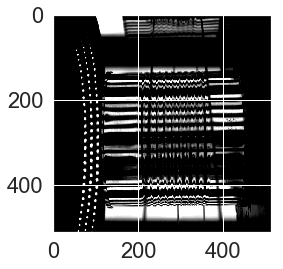

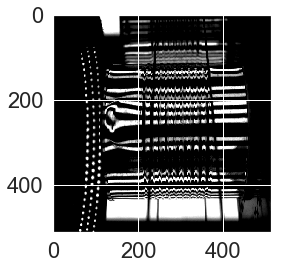

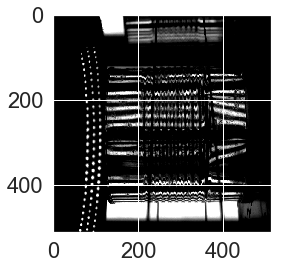

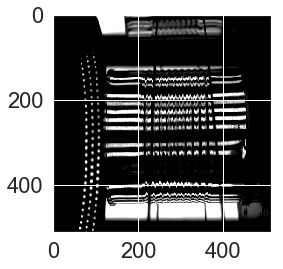

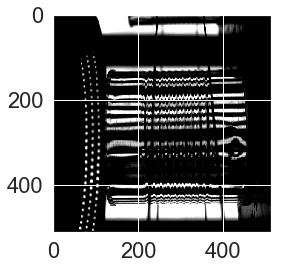

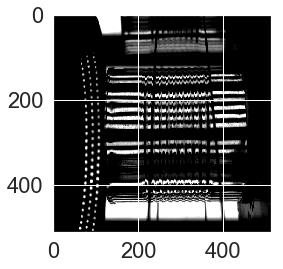

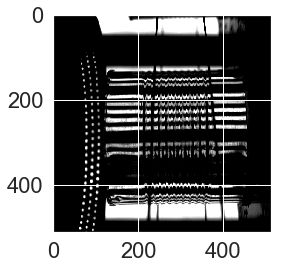

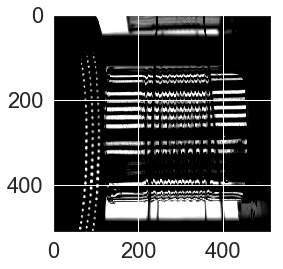

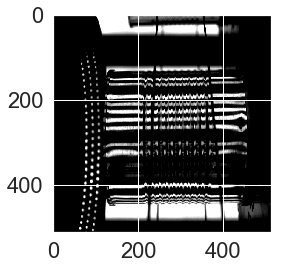

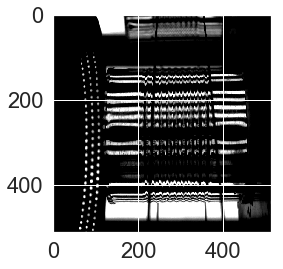

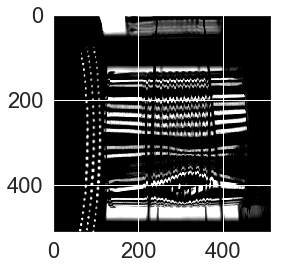

In [151]:
for i,filename in enumerate(glob.glob("dataset/cam1_splitted/test/NOT_OK/*.png")):
    img=image.load_img(filename, target_size=(512, 512))
#     plt.figure()
   
#     print(i) 
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
#     print(classes[0])
    if classes[0]>0.5:
#         plt.axis('off')
#         plt.grid(b=None)
#         plt.figure(figsize=((10,10)))
# #         plt.subplot(300, 4, i+1)
        plt.imshow(img)
        plt.show()
    